<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/EDA_using_movie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("finalCleanedData.csv")

In [3]:
data["profit"]=data["profit"].apply(lambda x:int(x*100))

In [4]:
data

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages,profit
0,0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,Animation,Comedy,Family,NaN,True,41695.5,pixar animation studios,NaN,1,1145
1,1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,Adventure,Fantasy,Family,NaN,False,16649.7,tristar pictures,teitler film,2,304
2,3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,Comedy,Drama,Romance,NaN,False,207.4,twentieth century fox film corporation,NaN,1,409
3,5,0,60000000,949,tt0113277,en,heat,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170.0,Released,A Los Angeles Crime Saga,False,7.7,1886,-1,Action,Crime,Drama,Thriller,False,14522.2,regency enterprises,forward pass,2,212
4,8,0,35000000,9091,tt0114576,en,sudden death,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106.0,Released,Terror goes into overtime.,False,5.5,174,-1,Action,Adventure,Thriller,NaN,False,957.0,universal pictures,imperial entertainment,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,45250,0,12000000,24049,tt0479751,ta,சிவாஜி,corrupt police and politicians target a comput...,1.323587,2007-06-14,19000000,185.0,Released,NaN,False,6.9,25,-1,Action,Comedy,Drama,NaN,False,172.5,avm productions,NaN,2,58
5371,45399,0,750000,280422,tt3805180,ru,все и сразу,NaN,0.201582,2014-06-05,3,0.0,Released,NaN,False,6.0,4,-1,Crime,Comedy,NaN,NaN,False,24.0,кинокомпания «lunapark»,инвада фильм,1,-99
5372,45409,0,800000,62757,tt0933361,en,dikari,"the sea, august, interesting and simple people...",0.903061,2006-11-23,1328612,100.0,Released,NaN,False,5.8,6,-1,Comedy,Drama,NaN,NaN,False,34.8,NaN,NaN,1,66
5373,45412,0,2000000,63281,tt1718881,en,про любоff,"у девушки даши, приехавшей с подругой «покорят...",0.121844,2010-09-30,1268793,107.0,Released,NaN,False,4.0,3,-1,Romance,Drama,NaN,NaN,False,12.0,profit,NaN,1,-36


**Do the movies that have high vote_avergae make lot of profits ?**

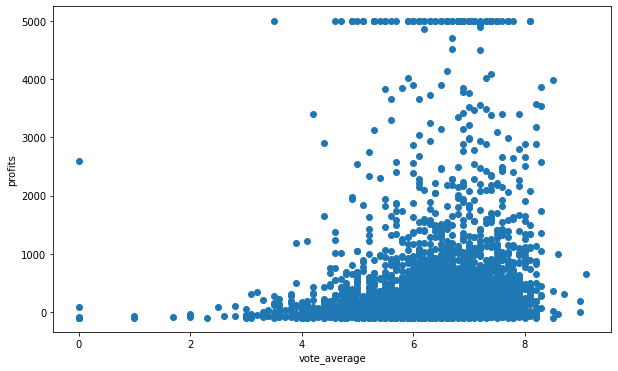

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("vote_average")
plt.ylabel("profits")
plt.scatter(data.vote_average,data.profit)

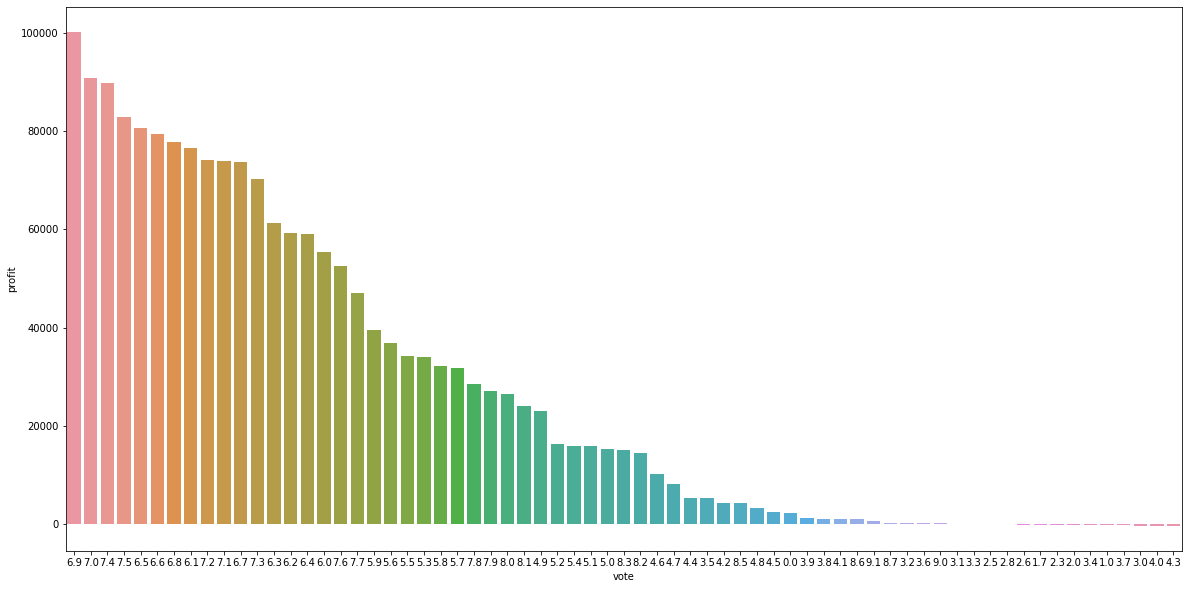

In [ ]:
m=[]
for i in data.vote_average.unique():
  m.append(i)
n=[]
for i in m:
  new=data[data["vote_average"]==i]
  n.append(sum(new["profit"]))
f=pd.DataFrame({"vote":m,"profit":n})
plt.figure(figsize=(20,10))
sns.barplot(x="vote",y="profit",data=f,order=f.sort_values('profit',ascending=False).vote)

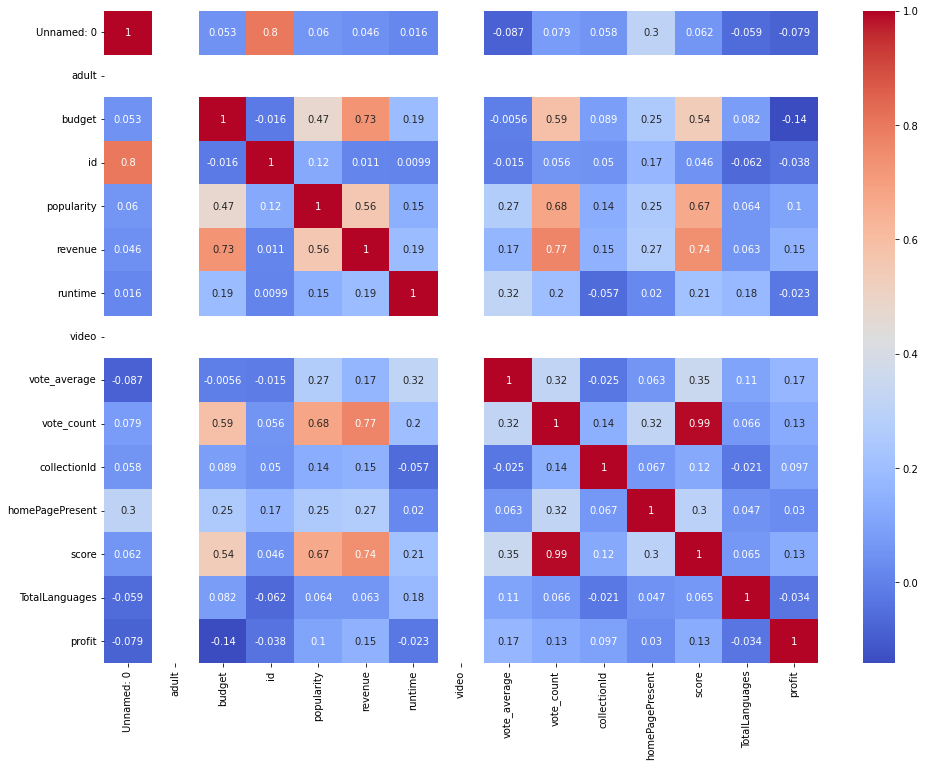

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

From the above charts,we can conclude that average rated films had made more profits

**Which languages rakes in high profit?**

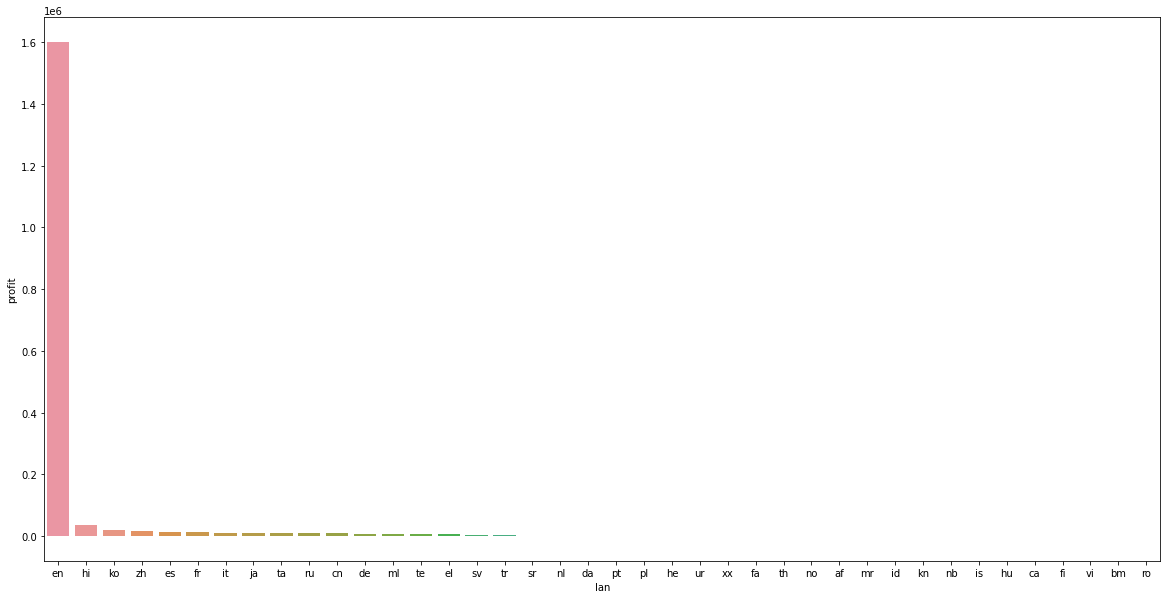

In [ ]:
m=[]
for i in data.original_language.unique():
  m.append(i)
n=[]
for i in m:
  new=data[data["original_language"]==i]
  n.append(sum(new["profit"]))
f=pd.DataFrame({"lan":m,"profit":n})
plt.figure(figsize=(20,10))
sns.barplot(x="lan",y="profit",data=f,order=f.sort_values('profit',ascending=False).lan)

English language films had made more profits.

**Will a longer run time bring higher profits?**

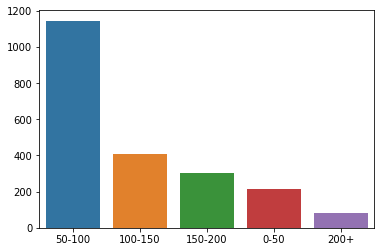

In [ ]:
n=[]
for i in data["runtime"]:
  if i<50:
    n.append("0-50")
  elif(i>50 and i<100):
    n.append("50-100")
  elif(i>100 and i<150):
    n.append("100-150")
  elif(i>150 and i<200):
    n.append("150-200")
  else:
    n.append("200+")
n=list(set(n))
d=pd.DataFrame({"Duration":n}) 
duration=pd.concat([data,d],axis=1)
m=[]
for i in n:
  new=duration[duration["Duration"]==i]
  m.append(sum(new["profit"]))
final=pd.DataFrame({"duration":n,"profit":m})
sns.barplot(x=n,y=m,data=final,order=final.sort_values('profit',ascending=False).duration)

Longer run time does not bring more profits.

**If the movie speaks multiple languages, is the profit % higher?**

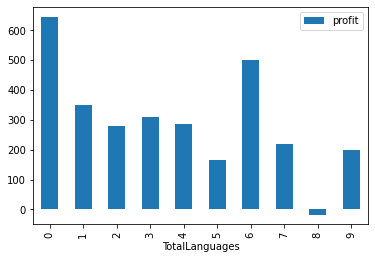

In [ ]:
data.pivot_table(index="TotalLanguages",values="profit").plot(kind="bar")

Multiple language films does not make more profits

**Does the presence of a homepage indicate higher profits?**

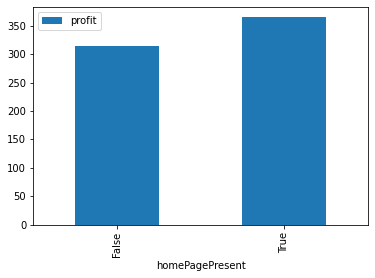

In [ ]:
data.pivot_table(index="homePagePresent",values="profit").plot(kind="bar")

Above graph shows that presence of homepage had make good profits

**What genres make the most money?**

genre1
genre2
genre3
genre4


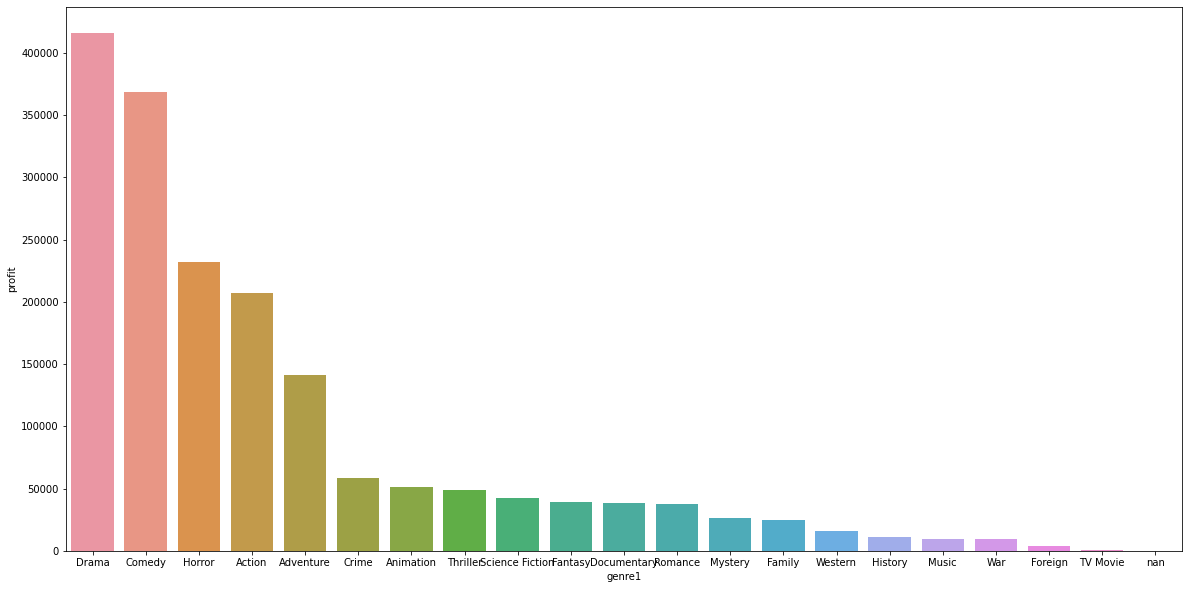

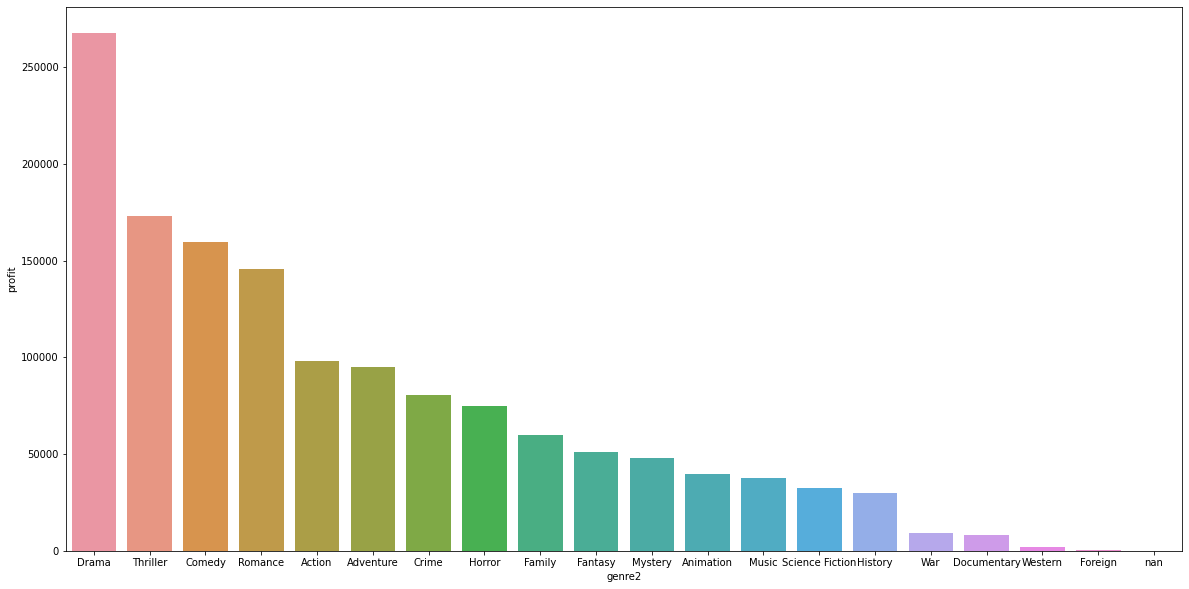

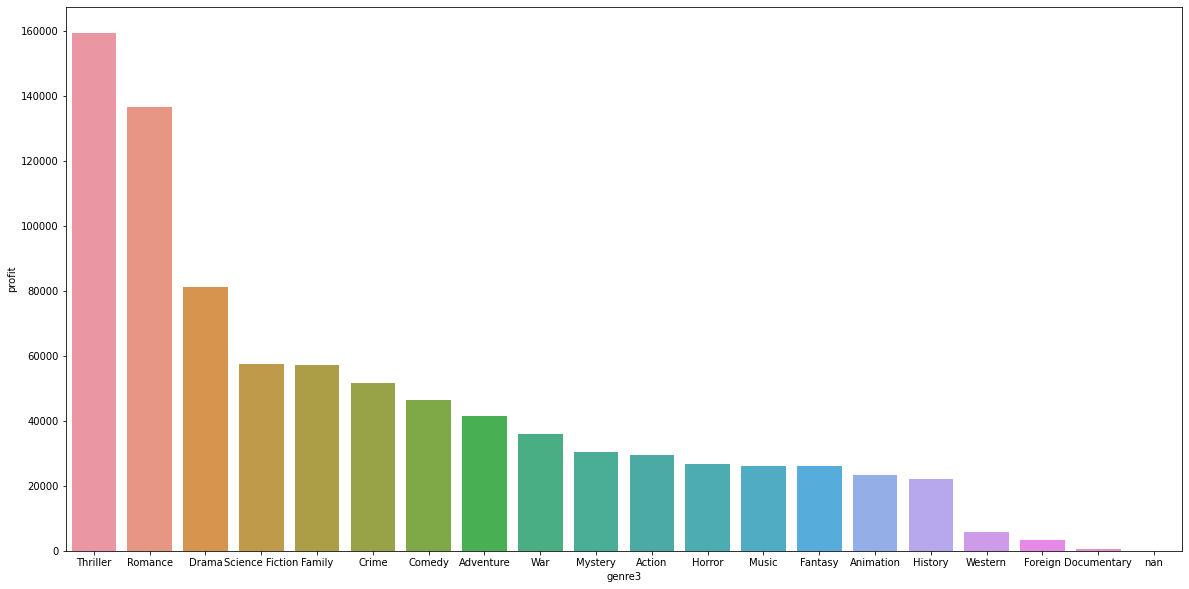

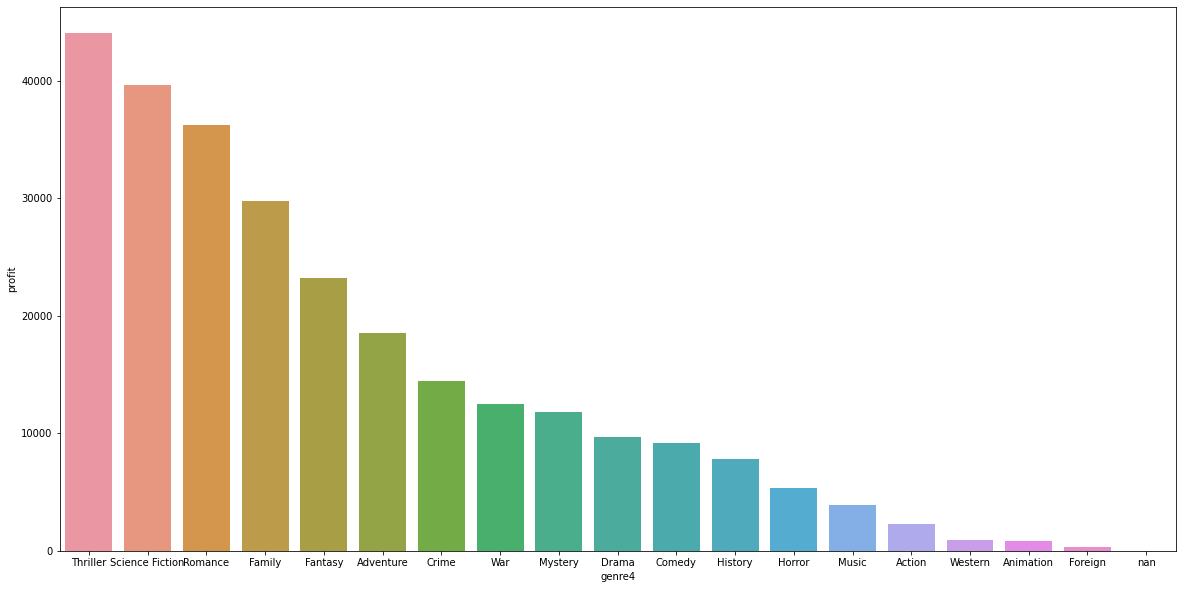

In [ ]:
gen=["genre1","genre2","genre3","genre4"]
for h in gen:
  m=[]
  print(h)
  for i in data[h].unique():
    m.append(i)
  n=[]
  for i in m:
    new=data[data[h]==i]
    n.append(sum(new["profit"]))
  f=pd.DataFrame({h:m,"profit":n})
  plt.figure(figsize=(20,10))
  sns.barplot(x=h,y="profit",data=f,order=f.sort_values('profit',ascending=False)[h])

Drama,comedy,romance and thriller films had made more profits

**Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ?**

In [ ]:
data["year"]=data["release_date"].apply(lambda x:int(x[0:4]))

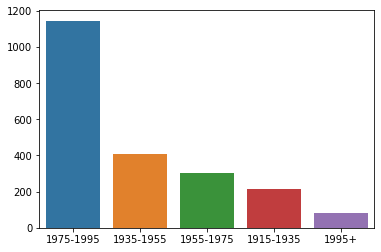

In [ ]:
n=[]
for i in data["year"]:
  if i<1935:
    n.append("1915-1935")
  elif(i>1935 and i<1955):
    n.append("1935-1955")
  elif(i>1955 and i<1975):
    n.append("1955-1975")
  elif(i>1975 and i<1995):
    n.append("1975-1995")
  else:
    n.append("1995+")
n=list(set(n))
d=pd.DataFrame({"Year_modified":n}) 
year_modified=pd.concat([data,d],axis=1)
m=[]
for i in n:
  new=year_modified[year_modified["Year_modified"]==i]
  m.append(sum(new["profit"]))
final=pd.DataFrame({"year_modified":n,"profit":m})
sns.barplot(x=n,y=m,data=final,order=final.sort_values('profit',ascending=False).year_modified)

Over the period of time,the profitability decreases as the year increases which can be seen from the above graph.

**Which producers generally do well?**

In [5]:
x=data[["Producer1","Producer2","profit"]]
new=x.sort_values("profit",ascending=False)
final=new[new["profit"]==max(new["profit"])]
final

,Producer1,Producer2,profit
717,walt disney productions,NaN,5000
1854,blood relations co.,NaN,5000
3678,paramount pictures,blumhouse productions,5000
4709,bazelevs production,blumhouse productions,5000
2291,wadleigh-maurice,warner bros.,5000
...,...,...,...
2983,summit entertainment,samson films,5000
1460,twentieth century fox film corporation,amercent films,5000
1240,united artists,charles chaplin productions,5000
1457,renaissance pictures,NaN,5000


The above 86 producers had made the most profits